In [51]:
# Initial imports:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
from matplotlib import pyplot as plt

#new library we have not used before 
import datetime as dt

In [53]:
# Read-in returns dataframe and set index as "Date":
bitcoin_history_csv = Path("./CSV/bitcoin_history.csv")
bitcoin_history_df = pd.read_csv(bitcoin_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Sort index in ascending order:
bitcoin_history_df.sort_index(inplace=True)

# Display first five rows:
bitcoin_history_df.head()




,Price
Date,
2014-01-02,773.44
2014-01-03,802.85
2014-01-04,823.27
2014-01-05,858.55
2014-01-06,936.05


In [85]:
# Calculate S&P 500 daily returns using .pct_change() function:
bitcoin_returns = bitcoin_history_df.pct_change()
bitcoin_returns = bitcoin_returns.applymap(lambda x: "{:.2%}".format(x))

# Rename column:
bitcoin_returns.columns = ["Bitcoin Daily Returns"]

# Drop nulls:
bitcoin_returns.dropna(inplace=True)

# Preview DataFrame
bitcoin_returns.head()

,Bitcoin Daily Returns
Date,
2014-01-02,nan%
2014-01-03,3.80%
2014-01-04,2.54%
2014-01-05,4.29%
2014-01-06,9.03%


In [87]:
# Read S&P500 returns and set index as "Date"
sp500_history_csv = Path("./CSV/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

#removes weekday
columns_to_drop = [col for col in sp500_history_df.columns if "Weekday" in col]
sp500_history_df.drop(columns=columns_to_drop, inplace=True)

# Sort index in ascending order:
sp500_history_df.sort_index(inplace=True)

# Preview DataFrame:
sp500_history_df.head()

,Price
Date,
2020-01-01,3234.35
2020-01-02,3231.56
2020-01-03,3242.41
2020-01-06,3238.21
2020-01-07,3243.80


In [89]:
# Remove "$" from values in "Close" column and convert data type from "object" to "float":
sp500_history_df["Price"] = sp500_history_df["Price"].replace("$", "").astype("float")

# Confirm data type conversion:
sp500_history_df.dtypes

Price    float64
dtype: object

In [90]:
# Calculate S&P 500 daily returns using .pct_change() function:
sp500_daily_returns = sp500_history_df.pct_change()
sp500_daily_returns = sp500_daily_returns.applymap(lambda x: "{:.2%}".format(x))


# Rename column:
sp500_daily_returns.columns = ["S&P 500 Daily Returns"]

# Drop nulls:
sp500_daily_returns.dropna(inplace=True)

# Preview DataFrame
sp500_daily_returns.head()



,S&P 500 Daily Returns
Date,
2020-01-01,nan%
2020-01-02,-0.09%
2020-01-03,0.34%
2020-01-06,-0.13%
2020-01-07,0.17%


In [91]:
# Concatenate all dataframes into a single dataframe:
daily_returns_df = pd.concat([bitcoin_history_df, sp500_daily_returns], axis='columns', join='inner')
daily_returns_df.head()

,Price,S&P 500 Daily Returns
Date,,


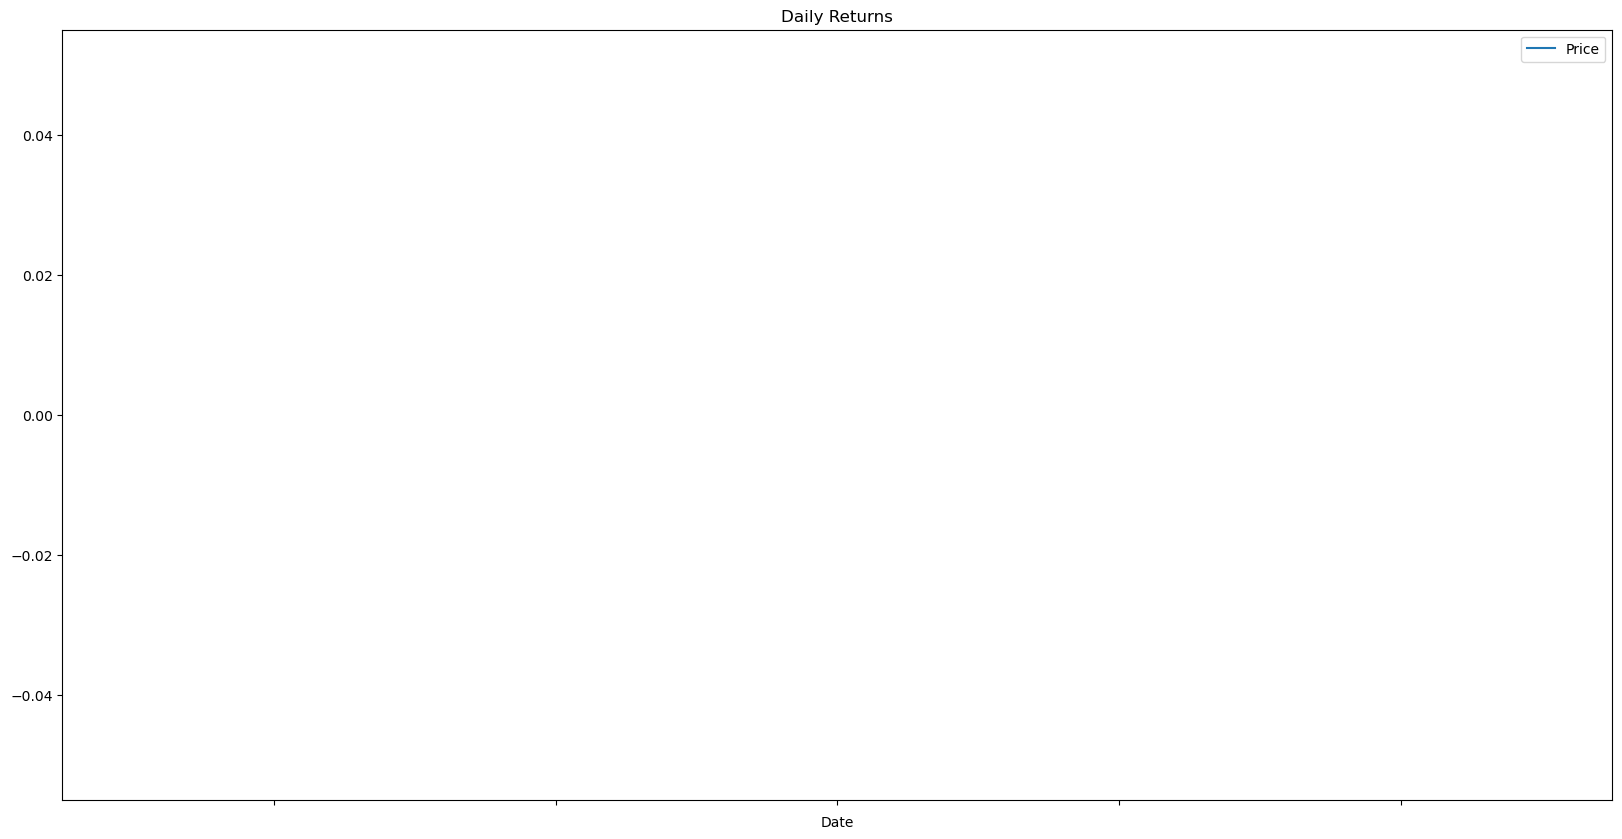

In [92]:
# Plot Daily Returns:
daily_returns_df.plot(figsize=(20,10), title="Daily Returns")
plt.margins(x=0)

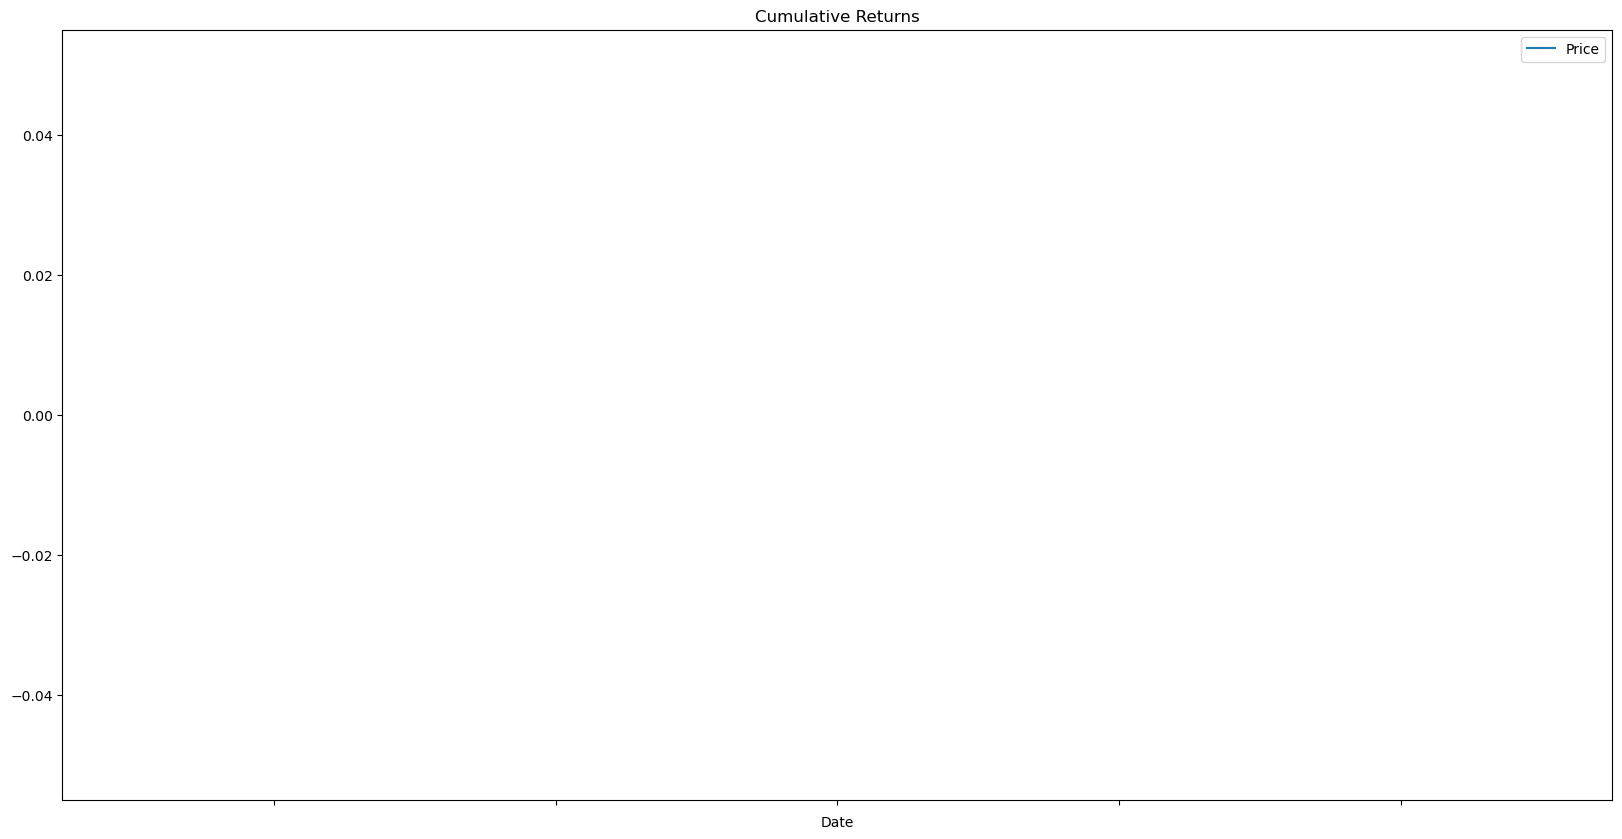

In [93]:
# Plot Cumulative Returns:
cumulative_returns = (1 + daily_returns_df).cumprod()
cumulative_returns.plot(figsize = (20,10), title="Cumulative Returns")
plt.margins(x=0)

<AxesSubplot:title={'center':'Portfolio Risk'}>

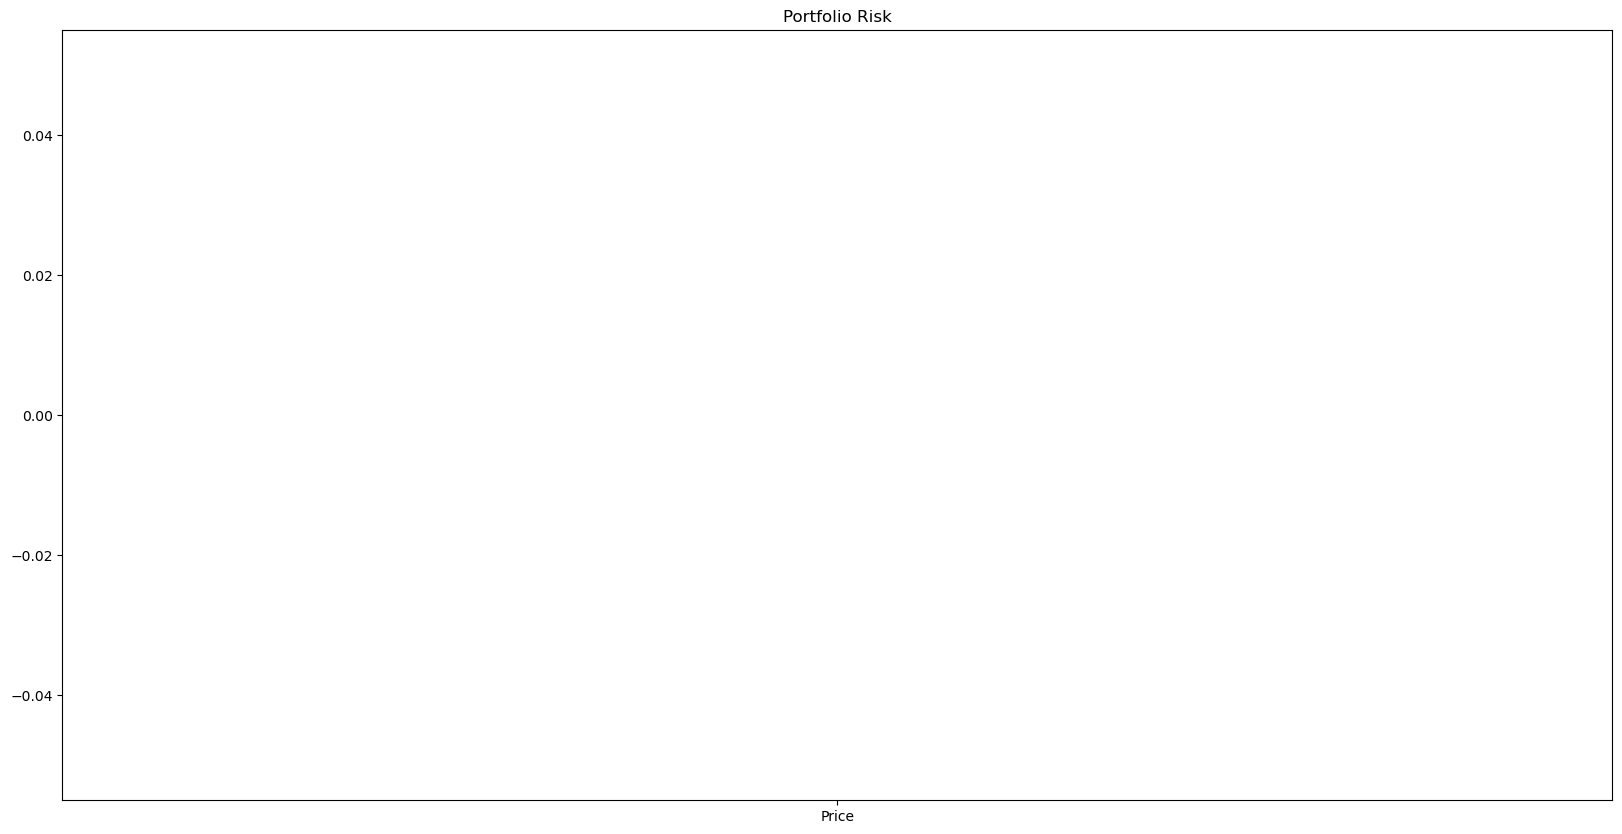

In [94]:

# Box plot to visually show risk:
daily_returns_df.plot(kind = "box", figsize = (20,10), title="Portfolio Risk")



In [95]:
# Calculate the standard deviation for each portfolio:
daily_std_df = pd.DataFrame(daily_returns_df.std()).rename(columns = {0:"Standard Deviation"})
daily_std_df



,Standard Deviation
Price,NaN
S&P 500 Daily Returns,NaN


In [96]:
# Determine which portfolios are riskier than the S&P 500:
higher_std = daily_std_df[daily_std_df["Standard Deviation"] > daily_std_df.loc["S&P 500 Daily Returns", "Standard Deviation"]]
higher_std



,Standard Deviation


In [97]:
# Calculate the annualized standard deviation (252 trading days):
annualized_std_df = daily_std_df * np.sqrt(252)

# Rename "Standard Deviation" column to "Annualized Standard_Deviation"
annualized_std_df.columns = ["Annualized Standard Deviation"]

# Make new dataframe with sorted data: 
annualized_std_df_sorted = annualized_std_df.sort_values("Annualized Standard Deviation", ascending=False)
annualized_std_df_sorted

,Annualized Standard Deviation
Price,NaN
S&P 500 Daily Returns,NaN


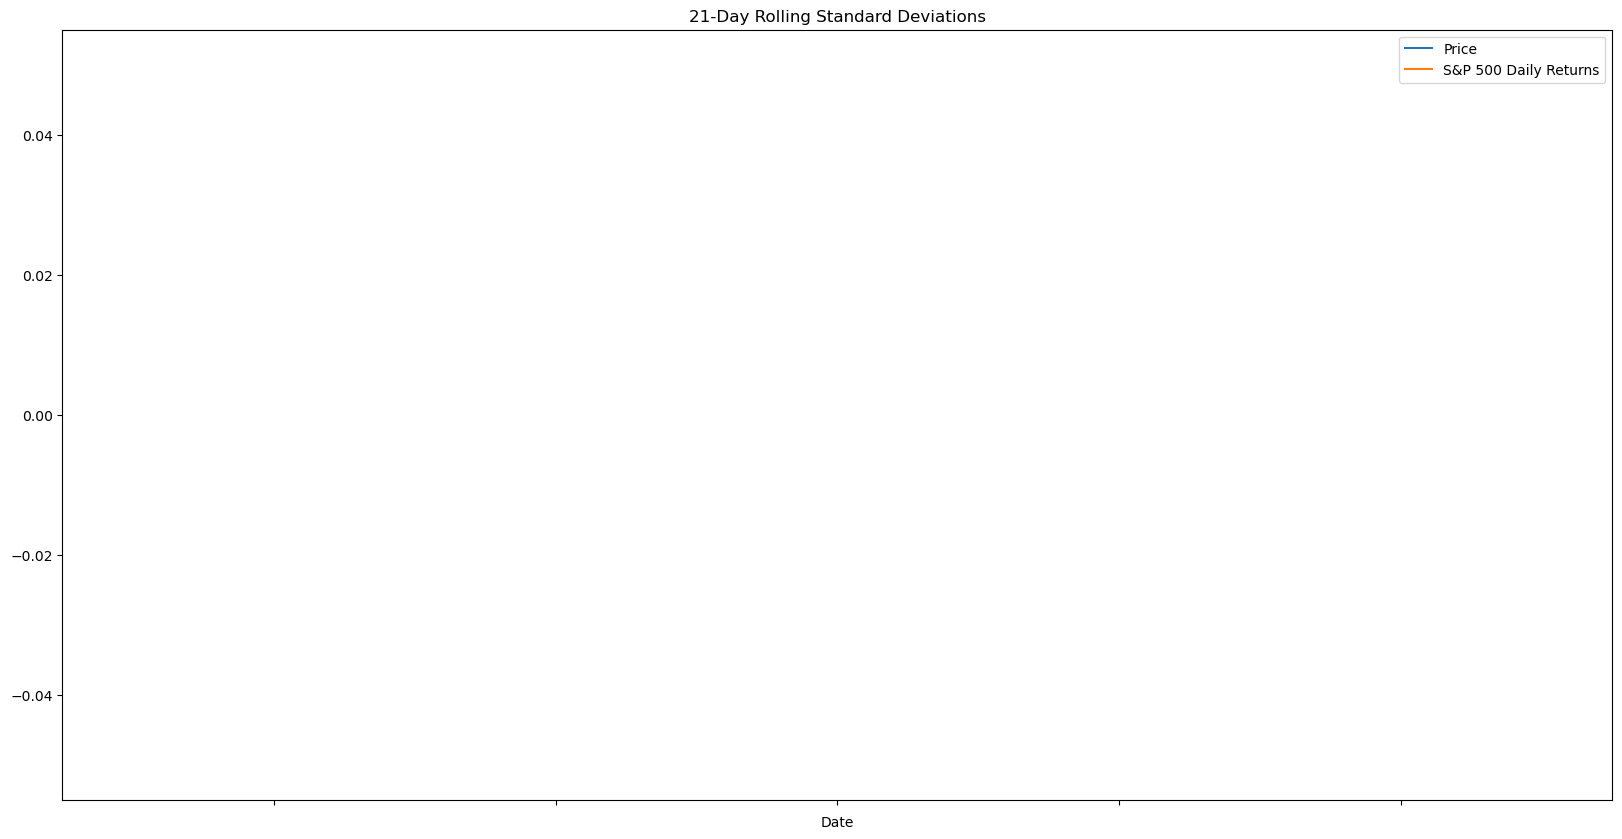

In [98]:
#rolling standard deviations, 21-day trading window:
sp500_rolling_std = daily_returns_df.rolling(window=21).std()
sp500_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")
plt.margins(x=0)



In [99]:
# Construct a correlation table:
correlation = daily_returns_df.corr()
correlation



,Price
Price,NaN


In [112]:
#Compare bitcoin to SP500

# First, calculate rolling covariance:
rolling_covariance = bitcoin_returns['Bitcoin Daily Returns'].rolling(window=60).cov(daily_returns_df['S&P 500 Daily Returns'])

# Now, calculate rolling variance:
rolling_variance = daily_returns_df['S&P 500 Daily Returns'].rolling(window=60).var()



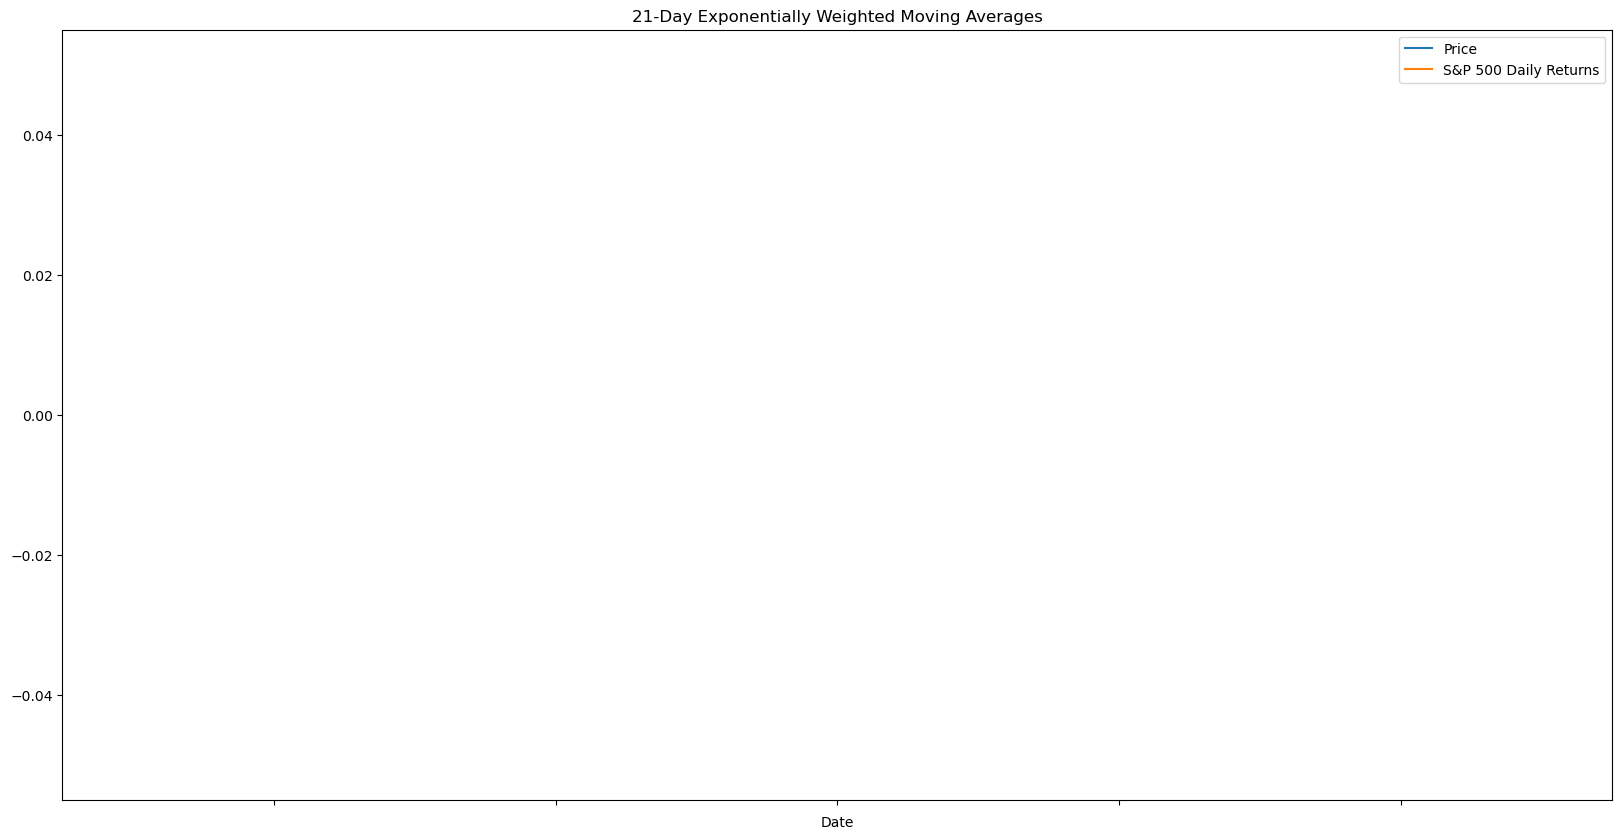

In [113]:
# Calculate and plot a rolling window using the exponentially weighted moving average:
rolling_ewm = daily_returns_df.ewm(span = 21, adjust = False).mean()
(1 + rolling_ewm).cumprod().plot(figsize = (20,10), title="21-Day Exponentially Weighted Moving Averages")
plt.margins(x=0)


In [114]:
# Calculate annualized Sharpe Ratios:
annualized_sharpe_ratios = daily_returns_df.mean()*252 / (daily_returns_df.std()*np.sqrt(252))

# Sort Sharpe Ratios:
annualized_sharpe_ratios_sorted = annualized_sharpe_ratios.sort_values(ascending=False)
annualized_sharpe_ratios_sorted

Price                    NaN
S&P 500 Daily Returns    NaN
dtype: object

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

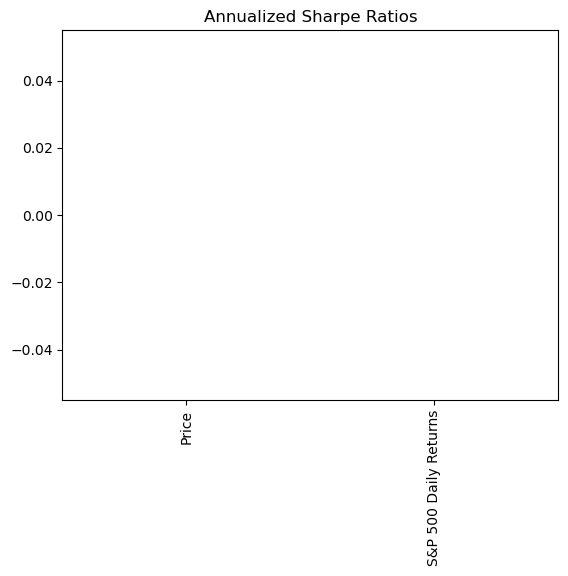

In [115]:
# Visualize the sharpe ratios as a bar plot:
annualized_sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratios")

